# Exploration of Rape Victims in India Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns   #DataVis Library
import matplotlib.pyplot as plt
from tabulate import tabulate

# configure matplotlib to output inline
%matplotlib inline

In [17]:
rape_victims = pd.read_csv('DataSet/Victims of rape_Statewise.csv')
rape_victims.head()

#FORMAT of the dataset
#State/Area Name
#   -Total Rape Victims
#   -Victims of incest rape
#   -Victims of other rape
#      -Age Group
#         -Cases Reported
#         -Total Cases

,Area_Name,Year,Subgroup,Victims_Upto_10_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Above_50_Yrs,Rape_Cases_Reported,Victims_of_Rape_Total
0,Andaman & Nicobar Islands,2001,Total Rape Victims,0,0,3,0,0,0,3,3
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,0,0,1,0,0,0,1,1
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,0,0,2,0,0,0,2,2
3,Andaman & Nicobar Islands,2002,Total Rape Victims,0,0,1,1,0,0,2,2
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [18]:
# Cleaning of data, taking the data only required to us

# As total rape cases in a state, would be equal to no. of incest rapes and other kinds of rape, we can remove that particular row
# Removing all the rows, where the subgroup is 'Total Rape Victims'
rape_victims = rape_victims[rape_victims['Subgroup'] != 'Total Rape Victims']

# As we have 2 cols, 'Total Cases Reported' and 'Total Cases'
# Seeing that are there any cases that have not been reported.
rape_victims[rape_victims['Victims_of_Rape_Total'] != rape_victims['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Victims_Upto_10_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Above_50_Yrs,Rape_Cases_Reported,Victims_of_Rape_Total
152,Chandigarh,2001,Victims of Other Rape,0,8,4,2,3,0,16,17
272,Delhi,2001,Victims of Other Rape,45,78,152,58,41,0,372,374
275,Delhi,2002,Victims of Other Rape,31,48,40,207,49,0,371,375
284,Delhi,2005,Victims of Other Rape,49,111,45,402,25,2,626,634
287,Delhi,2006,Victims of Other Rape,67,107,255,148,21,2,597,600


CONCLUSION: There are some cases that are not reported. Cases are mentioned above.

In [20]:
# Adding another column, 'Unreported Cases'
rape_victims['Unreported_Cases'] = rape_victims['Victims_of_Rape_Total'] - rape_victims['Rape_Cases_Reported']


In [24]:
# Plotting no of 'Unreported Cases' per Area/State

# let's plot the unreported rape cases sorted by states throughout 2001 to 2010
unreported_victims_by_state = rape_victims.groupby('Area_Name').sum()
unreported_victims_by_state.drop('Year', axis = 1, inplace = True)
print(unreported_victims_by_state['Unreported_Cases'])


Area_Name
Andaman & Nicobar Islands     0
Andhra Pradesh                0
Arunachal Pradesh             0
Assam                         0
Bihar                         0
Chandigarh                    1
Chhattisgarh                  0
Dadra & Nagar Haveli          0
Daman & Diu                   0
Delhi                        25
Goa                           4
Gujarat                       2
Haryana                       0
Himachal Pradesh              0
Jammu & Kashmir              -2
Jharkhand                     0
Karnataka                     0
Kerala                       12
Lakshadweep                   0
Madhya Pradesh                1
Maharashtra                  59
Manipur                       2
Meghalaya                    13
Mizoram                       0
Nagaland                      0
Odisha                        0
Puducherry                    0
Punjab                        7
Rajasthan                     5
Sikkim                        4
Tamil Nadu                   1

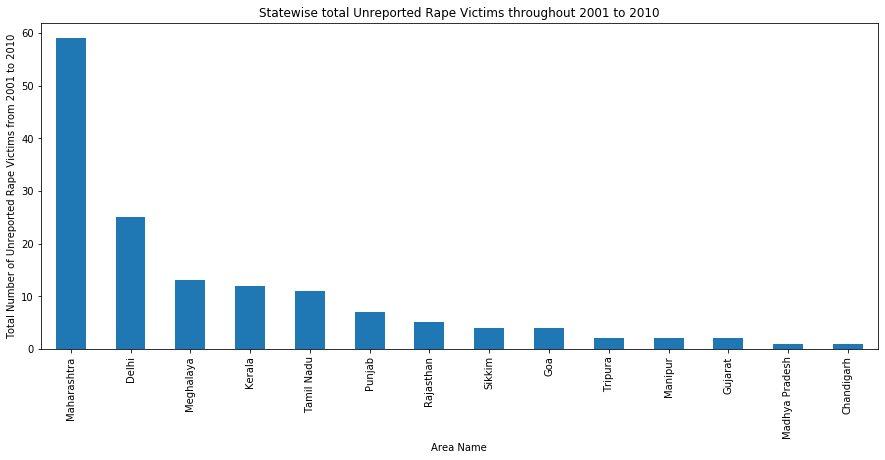

Data presented: 
Area_Name
Maharashtra       59
Delhi             25
Meghalaya         13
Kerala            12
Tamil Nadu        11
Punjab             7
Rajasthan          5
Sikkim             4
Goa                4
Tripura            2
Manipur            2
Gujarat            2
Madhya Pradesh     1
Chandigarh         1
Name: Unreported_Cases, dtype: int64


In [26]:
# Plotting Unreported cases
plt.subplots(figsize = (15, 6))
ct = unreported_victims_by_state[unreported_victims_by_state['Unreported_Cases'] > 0]['Unreported_Cases'].sort_values(ascending = False)

ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2010')
plt.show()

print("Data presented: ")
print(ct)

CONCLUSION: Looks like Maharastra has the most number of unreported rape cases.

Area_Name
Andaman & Nicobar Islands       84
Andhra Pradesh               10696
Arunachal Pradesh              412
Assam                        12762
Bihar                        11263
Chandigarh                     227
Chhattisgarh                  9751
Dadra & Nagar Haveli            49
Daman & Diu                     14
Delhi                         5146
Goa                            266
Gujarat                       3337
Haryana                       5009
Himachal Pradesh              1453
Jammu & Kashmir               2230
Jharkhand                     7563
Karnataka                     3917
Kerala                        5296
Lakshadweep                      7
Madhya Pradesh               29256
Maharashtra                  14446
Manipur                        271
Meghalaya                      726
Mizoram                        646
Nagaland                       176
Odisha                        8860
Puducherry                      57
Punjab                        4300
Rajasthan 

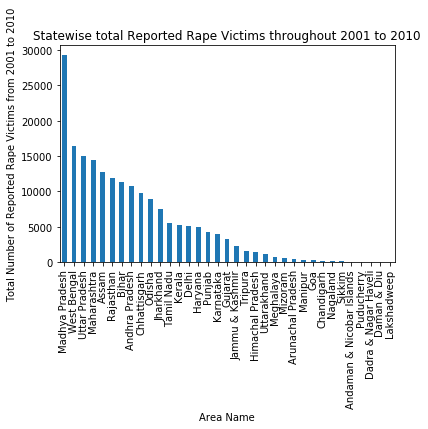

Data presented: 
Area_Name
Madhya Pradesh               29256
West Bengal                  16378
Uttar Pradesh                15053
Maharashtra                  14446
Assam                        12762
Rajasthan                    11949
Bihar                        11263
Andhra Pradesh               10696
Chhattisgarh                  9751
Odisha                        8860
Jharkhand                     7563
Tamil Nadu                    5538
Kerala                        5296
Delhi                         5146
Haryana                       5009
Punjab                        4300
Karnataka                     3917
Gujarat                       3337
Jammu & Kashmir               2230
Tripura                       1624
Himachal Pradesh              1453
Uttarakhand                   1101
Meghalaya                      726
Mizoram                        646
Arunachal Pradesh              412
Manipur                        271
Goa                            266
Chandigarh                  

In [30]:
# Now plotting the 'Rape Cases Reported' statewise
reported_rape_victims_by_state = rape_victims.groupby('Area_Name').sum()
reported_rape_victims_by_state.drop('Year', axis = 1, inplace = True)

print(reported_rape_victims_by_state['Rape_Cases_Reported'])
ct = reported_rape_victims_by_state['Rape_Cases_Reported'].sort_values(ascending = False)

ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Reported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Reported Rape Victims throughout 2001 to 2010')
plt.show()

print("Data presented: ")
print(ct)

CONCLUSION: Madhya Pradesh has the most reported rape cases in India

With an heatmap, we can show the number of statewise victims based on their age groups

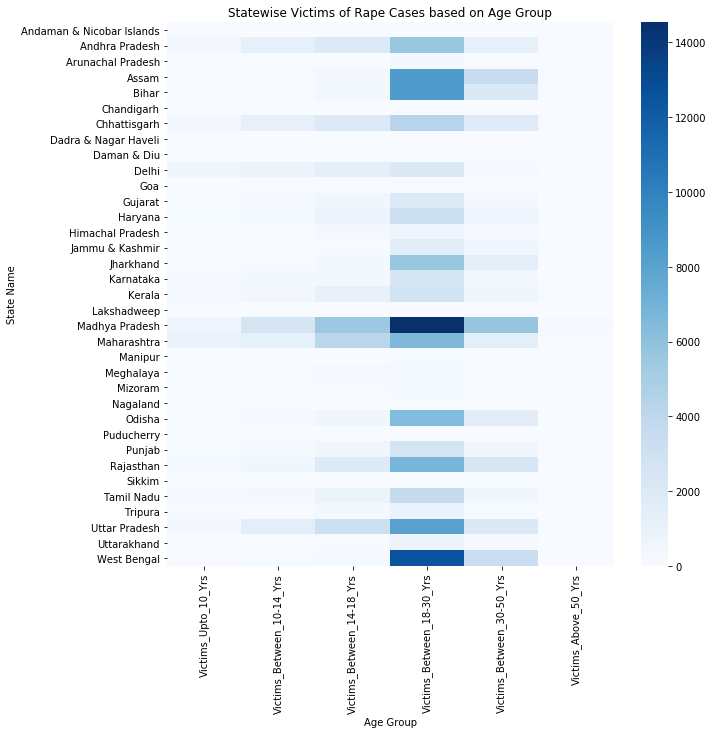

In [41]:
# With an heatmap, we can show the number of statewise victims based on their age groups
rape_victims_by_state = rape_victims.groupby("Area_Name").sum()
rape_victims_by_state = rape_victims_by_state.drop(['Year'], axis=1)

rape_victims_heatmap = rape_victims_by_state.drop(['Rape_Cases_Reported', 
                                                   'Victims_of_Rape_Total', 
                                                   'Unreported_Cases'], axis = 1)
# Now the data frame only has age wise dist of rape cases in a particular area
plt.subplots(figsize = (10, 10))
ax = sns.heatmap(rape_victims_heatmap, cmap='Blues')
ax.set_xlabel('Age Group')
ax.set_ylabel('State Name')
ax.set_title('Statewise Victims of Rape Cases based on Age Group')
plt.show()

Madhya Pradesh has the most number of rape victims throughout the timespan, so analysing the 'Rape Culture' in Madhya Pradesh.

Let's have a look at Madhya Pradesh First

# Exploring Data for Madhya Pradesh

In [42]:
mp_rape_victims = rape_victims[rape_victims['Area_Name'] == 'Madhya Pradesh']

# let's have a look in the data
mp_rape_victims.head()

,Area_Name,Year,Subgroup,Victims_Upto_10_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Above_50_Yrs,Rape_Cases_Reported,Victims_of_Rape_Total,Unreported_Cases
571,Madhya Pradesh,2001,Victims of Incest Rape,10,39,66,130,56,0,301,301,0
572,Madhya Pradesh,2001,Victims of Other Rape,76,265,491,1120,571,27,2550,2550,0
574,Madhya Pradesh,2002,Victims of Incest Rape,3,11,16,37,4,1,72,72,0
575,Madhya Pradesh,2002,Victims of Other Rape,77,174,236,1512,807,13,2819,2819,0
577,Madhya Pradesh,2003,Victims of Incest Rape,3,10,23,71,16,0,123,123,0


## Yearly plot of the number of rape victims in Madhya Pradesh

Using the help of 'Line Chart' to analyse the no. of rape victims in Madhya Pradesh over the years.

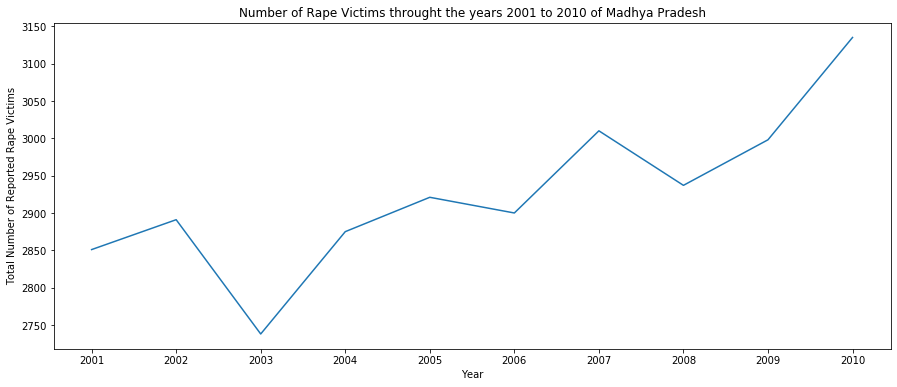

In [44]:
# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = mp_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims', 
       title = 'Number of Rape Victims throught the years 2001 to 2010 of Madhya Pradesh')
plt.show()

Previously, when exploring the data set, we've also seen an index for incest rape cases. Let's compare the numbers of incest rape cases to other rape cases for the sate of Madhya Pradesh

## Yearly Distribution of Number of Incest Rape Victims in Madhya Pradesh

In [61]:
# plot the dataframe
mp_incest_rape_cases = mp_rape_victims[mp_rape_victims['Subgroup'] == 'Victims of Incest Rape']
mp_other_rape_cases = mp_rape_victims[mp_rape_victims['Subgroup'] == 'Victims of Other Rape']

#print(mp_incest_rape_cases.head())
#print(mp_other_rape_cases.head())

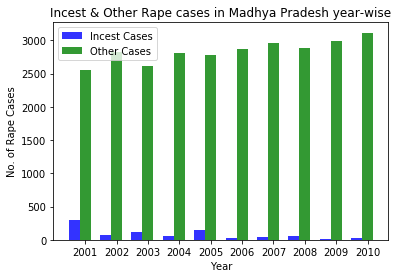

In [60]:
x = mp_incest_rape_cases['Year']
y1 = mp_incest_rape_cases['Rape_Cases_Reported']
y2 = mp_other_rape_cases['Rape_Cases_Reported']

fig, ax = plt.subplots()
index = np.arange(len(x))
bar_width = 0.35
opacity = 0.8

plt.bar(index, y1, bar_width,
alpha=opacity,
color='b',
label='Incest Cases')

plt.bar(index + bar_width, y2, bar_width,
alpha=opacity,
color='g',
label='Other Cases')

plt.xlabel('Year')
plt.ylabel('No. of Rape Cases')
plt.title('Incest & Other Rape cases in Madhya Pradesh year-wise')
plt.xticks(index + bar_width, x)
plt.legend()
plt.show()


# Data for Tamil Nadu

Studying the data of the state where we live today.

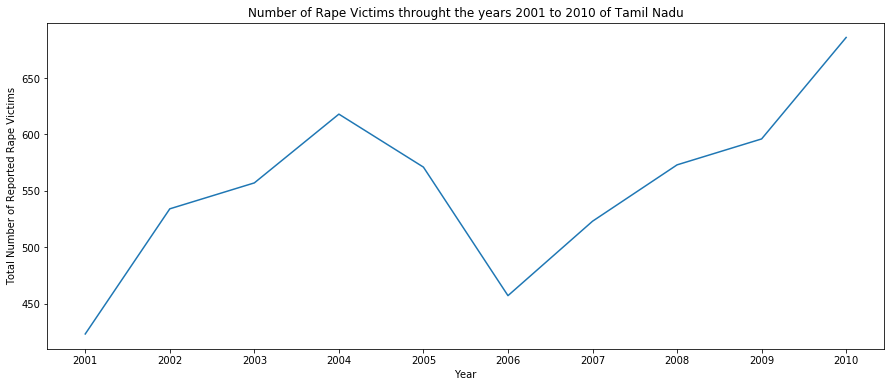

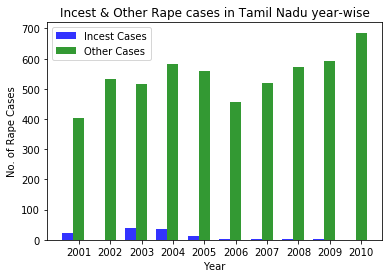

In [63]:
tn_rape_victims = rape_victims[rape_victims['Area_Name'] == 'Tamil Nadu']
tn_rape_victims_by_year = tn_rape_victims.groupby('Year').sum()


plt.subplots(figsize = (15, 6))
ax = tn_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims', 
       title = 'Number of Rape Victims throught the years 2001 to 2010 of Tamil Nadu')
plt.show()


tn_incest_rape_cases = tn_rape_victims[tn_rape_victims['Subgroup'] == 'Victims of Incest Rape']
tn_other_rape_cases = tn_rape_victims[tn_rape_victims['Subgroup'] == 'Victims of Other Rape']

#print(mp_incest_rape_cases.head())
#print(mp_other_rape_cases.head())

x = tn_incest_rape_cases['Year']
y1 = tn_incest_rape_cases['Rape_Cases_Reported']
y2 = tn_other_rape_cases['Rape_Cases_Reported']

fig, ax = plt.subplots()
index = np.arange(len(x))
bar_width = 0.35
opacity = 0.8

plt.bar(index, y1, bar_width,
alpha=opacity,
color='b',
label='Incest Cases')

plt.bar(index + bar_width, y2, bar_width,
alpha=opacity,
color='g',
label='Other Cases')

plt.xlabel('Year')
plt.ylabel('No. of Rape Cases')
plt.title('Incest & Other Rape cases in Tamil Nadu year-wise')
plt.xticks(index + bar_width, x)
plt.legend()
plt.show()



Now let's compare the Rape Crime rates between Tamil Nadu and Madhya Pradesh. This will help giving us an insight on how safe our state is.

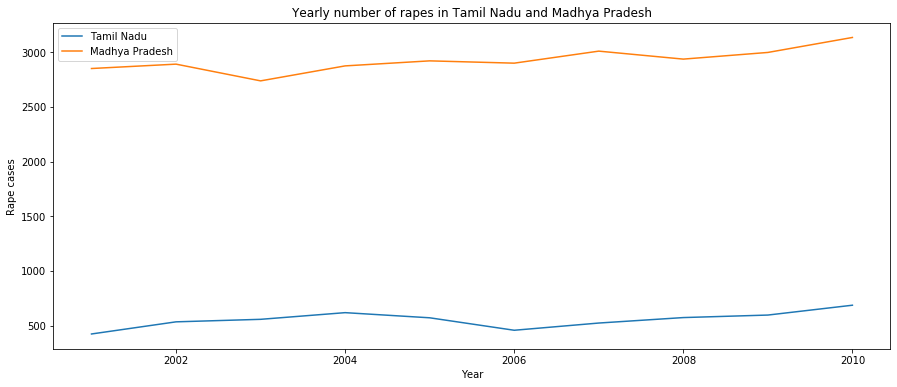

In [65]:
# let's calculate the percentage increase of number of rapes in Tamil Nadu and compare it with Madhya Pradesh
plt.subplots(figsize = (15, 6))
ax = (tn_rape_victims_by_year['Rape_Cases_Reported']).plot(legend = True, label = 'Tamil Nadu')
(mp_rape_victims_by_year['Rape_Cases_Reported']).plot(ax = ax, legend = True, label = 'Madhya Pradesh')
ax.set(xlabel = 'Year', ylabel = 'Rape cases', 
       title = 'Yearly number of rapes in Tamil Nadu and Madhya Pradesh')
plt.show()

This clearly shows how safe Tamil Nadu is with respect to Madhya Pradesh in comaparison of the total no of rape cases.
But the true picture of how safe are the states continuing to become depends on the percent-change of cases in each year. This parameter will show us, where is the state heading in terms of safety.

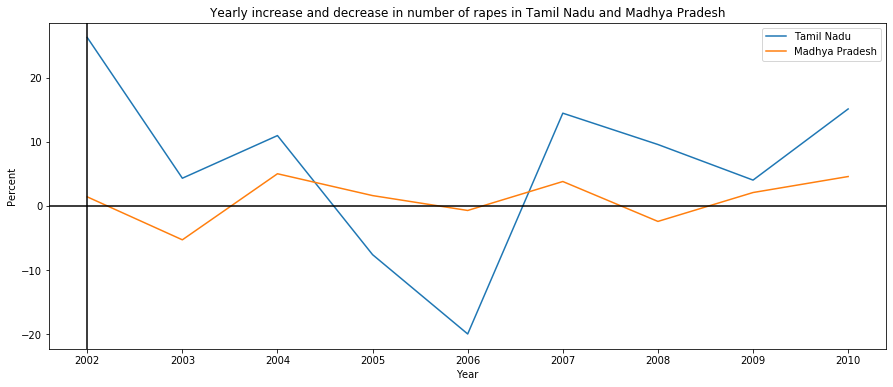

Overall Increase in number of rapes in Tamil Nadu = 38.34 Percent
Overall Increase in number of rapes in Madhya Pradesh = 12.29 Percent


In [67]:
# let's calculate the percentage increase of number of rapes in Tamil Nadu and compare it with Madhya Pradesh
plt.subplots(figsize = (15, 6))
ax = (tn_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(legend = True, 
                                                                              label = 'Tamil Nadu')
(mp_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(ax = ax, legend = True, 
                                                                         label = 'Madhya Pradesh')
ax.set(xlabel = 'Year', ylabel = 'Percent', 
       title = 'Yearly increase and decrease in number of rapes in Tamil Nadu and Madhya Pradesh')
ax.axhline(0, color = 'black')
ax.axvline(2002, color = 'black')
plt.show()
print('Overall Increase in number of rapes in Tamil Nadu =', 
      '{0:.2f}'.format(((tn_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - tn_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /tn_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')
print('Overall Increase in number of rapes in Madhya Pradesh =', 
      '{0:.2f}'.format(((mp_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - mp_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')

This brings out to show, that even though Tamil Nadu has lower cases of rapes currently. The trend shows that it is continuing to become less safe as the increase in rape crime in the state is increasing more rapidly with respect to Madhya Pradesh.